In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("/content/fire-occurence.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head(25)

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,Protected_Acres,HumanOrLightning,CauseBy,GeneralCause,SpecificCause,Cause_Comments,Lat_DD,Long_DD,LatLongDD,FO_LandOwnType,Twn,Rng,Sec,Subdiv,LandmarkLocation,County,RegUseZone,RegUseRestriction,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,0.75,Lightning,Lightning,Lightning,Lightning,NaN,44.91519,-119.28863,POINT (-119.28863 44.91519),BLM,07S,29E,31.0,NESW,11 MI SE Ritter LO,Grant,EC2,Reg Use Closure,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
1,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,80.00,Lightning,Lightning,Lightning,Lightning,NaN,45.08509,-118.33440,POINT (-118.3344 45.08509),Other Private,05S,36E,32.0,NESW,Woodley C.G,Union,NE3,Reg Use Closure,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
2,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,0.10,Human,Motorist,Smoking,Other - Smoker Related,NaN,42.53671,-123.21215,POINT (-123.21215 42.53671),BLM,35S,04W,7.0,SESE,7 N ROGUE RIVER,Jackson,SW3,Reg Use Closure,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
3,63735,STAT,2002,NOA,West Oregon,Philomath,02-551001-03,WREN,A,0.01,0.01,Human,Motorist,Recreation,Fireworks,NaN,44.58709,-123.42779,POINT (-123.42779 44.58709),State,11S,06W,28.0,SENW,Kings Valley,Benton,W01,Closed Fire Season Lvl 1,Lvl 1 Fire Season Only,07/06/2002 01:01:00 PM,07/06/2002 01:04:00 PM,07/06/2002 01:02:00 PM,07/06/2002 01:07:00 PM,07/07/2002 09:16:00 AM,07/28/2002 10:08:00 AM,55,551,001
4,68019,STAT,2003,NOA,West Oregon,Dallas,03-552013-04,Ritner Creek,A,0.01,0.01,Lightning,Lightning,Lightning,Lightning,NaN,44.74026,-123.49811,POINT (-123.49811 44.74026),Industrial,09S,07W,36.0,SWSW,Ritner Creek Park,Polk,WO1,Reg Use Closure,Lvl 3 Restricted Shutdown,08/22/2003 04:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 09:30:00 AM,08/22/2003 04:12:00 PM,09/04/2003 09:39:00 AM,55,552,013
5,68067,STAT,2003,EOA,Northeast Oregon,Wallowa,03-974016-04,Big Tamarack,A,0.01,0.01,Lightning,Lightning,Lightning,Lightning,NaN,45.63942,-117.40483,POINT (-117.40483 45.63942),Industrial,02N,43E,23.0,NWSE,Tope Creek,Wallowa,NE2,Reg Use Closure,Does Not Apply - Eastern OR,08/22/2003 06:00:00 PM,08/23/2003 09:24:00 AM,08/23/2003 09:24:00 AM,08/23/2003 12:40:00 PM,08/25/2003 02:16:00 PM,09/16/2004 03:07:00 PM,97,974,016
6,68224,STAT,2003,EOA,Walker Range - WRFPA,Crescent,03-991228-04,COIDC 918,A,0.00,0.00,Human,Other-Public,Debris Burning,Other - Burning Related,NaN,43.52418,-121.95545,POINT (-121.95545 43.52418),Rural Residential,24S,06E,1.0,SENW,12 W GILCHRIST,Klamath,WC2,Reg Use Closure,Does Not Apply - Eastern OR,08/30/2003 02:20:00 PM,08/30/2003 02:37:00 PM,08/30/2003 02:30:00 PM,08/30/2003 02:41:00 PM,09/01/2003 03:24:00 PM,09/12/2003 03:43:00 PM,99,991,228
7,73454,STAT,2005,NOA,Astoria,Astoria,05-521027-06,RAYMOND ROAD,A,0.01,0.01,Human,Public Utility,Equipment Use,Powerlines - prior to 2017,NaN,46.07650,-123.70566,POINT (-123.70566 46.0765),Rural Residential,07N,08W,17.0,SESW,"HWY 202, MP 12",Clatsop,NW2,Reg Use Closure,Lvl 1 Fire Season Only,09/18/2005 03:00:00 PM,09/18/2005 03:20:00 PM,09/18/2005 03:05:00 PM,09/18/2005 04:30:00 PM,09/21/2005 10:41:00 AM,09/25/2005 01:42:00 PM,52,521,027
8,73079,STAT,2005,EOA,Klamath-Lake,Klamath,05-981072-06,BLISS,A,0.01,0.01,Human,Motorist,Miscellaneous,Other - Miscellaneous Related,NaN,42

In [4]:
df.columns

Index(['Serial', 'FireCategory', 'FireYear', 'Area', 'DistrictName',
       'UnitName', 'FullFireNumber', 'FireName', 'Size_class', 'EstTotalAcres',
       'Protected_Acres', 'HumanOrLightning', 'CauseBy', 'GeneralCause',
       'SpecificCause', 'Cause_Comments', 'Lat_DD', 'Long_DD', 'LatLongDD',
       'FO_LandOwnType', 'Twn', 'Rng', 'Sec', 'Subdiv', 'LandmarkLocation',
       'County', 'RegUseZone', 'RegUseRestriction', 'Industrial_Restriction',
       'Ign_DateTime', 'ReportDateTime', 'Discover_DateTime',
       'Control_DateTime', 'CreationDate', 'ModifiedDate', 'DistrictCode',
       'UnitCode', 'DistFireNumber'],
      dtype='object')

In [5]:
df.shape

(23490, 38)

In [6]:
missing_values=df.isnull().sum()
missing_values

Serial                        0
FireCategory                  0
FireYear                      0
Area                          0
DistrictName                  0
UnitName                      0
FullFireNumber                0
FireName                      0
Size_class                    0
EstTotalAcres                79
Protected_Acres               0
HumanOrLightning              0
CauseBy                     128
GeneralCause                  0
SpecificCause               224
Cause_Comments            13684
Lat_DD                       10
Long_DD                      10
LatLongDD                    10
FO_LandOwnType                0
Twn                          12
Rng                          15
Sec                          12
Subdiv                       31
LandmarkLocation           1282
County                        0
RegUseZone                   50
RegUseRestriction            89
Industrial_Restriction       89
Ign_DateTime                 94
ReportDateTime                0
Discover

In [7]:
# Drop multiple columns
columns_to_drop = ['Serial', 'FireCategory','Area','FullFireNumber', 'FireName', 'HumanOrLightning', 'CauseBy','SpecificCause','Cause_Comments','LatLongDD',
       'FO_LandOwnType', 'Twn', 'Rng', 'Sec', 'Subdiv', 'LandmarkLocation','Industrial_Restriction','Discover_DateTime','CreationDate', 'ModifiedDate', 'DistrictCode',
       'UnitCode', 'DistFireNumber']

df = df.drop(columns=columns_to_drop)



In [8]:
df

,FireYear,DistrictName,UnitName,Size_class,EstTotalAcres,Protected_Acres,GeneralCause,Lat_DD,Long_DD,County,RegUseZone,RegUseRestriction,Ign_DateTime,ReportDateTime,Control_DateTime
0,2000,Central Oregon,John Day,B,0.75,0.75,Lightning,44.91519,-119.28863,Grant,EC2,Reg Use Closure,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/20/2000 12:50:00 AM
1,2000,Northeast Oregon,La Grande,C,80.00,80.00,Lightning,45.08509,-118.33440,Union,NE3,Reg Use Closure,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM
2,2001,Southwest Oregon,Grants Pass,A,0.10,0.10,Smoking,42.53671,-123.21215,Jackson,SW3,Reg Use Closure,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 06:30:00 PM
3,2002,West Oregon,Philomath,A,0.01,0.01,Recreation,44.58709,-123.42779,Benton,W01,Closed Fire Season Lvl 1,07/06/2002 01:01:00 PM,07/06/2002 01:04:00 PM,07/06/2002 01:07:00 PM
4,2003,West Oregon,Dallas,A,0.01,0.01,Lightning,44.74026,-123.49811,Polk,WO1,Reg Use Closure,08/22/2003 04:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 09:30:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,2021,Walker Range - WRFPA,Crescent,B,0.75,0.75,Equipment Use,43.52875,-121.35672,Klamath,WC2,Reg Use Closure,06/26/2021 04:00:00 PM,06/26/2021 04:58:00 PM,06/26/2021 09:58:00 PM
23486,2022,Western Lane,Veneta,A,0.01,0.01,Recreation,43.97600,-124.09933,Lane,SL2,Closed Fire Season Lvl 1,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 12:14:00 PM
23487,2021,Northeast Oregon,Pendleton,C,67.43,67.43,Lightning,45.01056,-119.08639,Umatilla,NE4,Closed Fire Season Lvl 1,06/13/2021 05:22:00 PM,06/14/2021 12:45:00 PM,06/17/2021 05:10:00 PM
23488,2022,Northeast Oregon,Pendleton,A,0.10,0.00,Equipment Use,45.58639,-118.46167,Umatilla,NE1,Reg Use Closure,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 04:41:00 PM


In [9]:
# Iterate through all columns and print unique values
for column_name in df.columns:
    unique_values_count = df[column_name].nunique()
    print(f'Column: {column_name}')
    print('Unique Values:', unique_values_count)
    print('-' * 40)

Column: FireYear
Unique Values: 23
----------------------------------------
Column: DistrictName
Unique Values: 14
----------------------------------------
Column: UnitName
Unique Values: 31
----------------------------------------
Column: Size_class
Unique Values: 7
----------------------------------------
Column: EstTotalAcres
Unique Values: 1218
----------------------------------------
Column: Protected_Acres
Unique Values: 1098
----------------------------------------
Column: GeneralCause
Unique Values: 10
----------------------------------------
Column: Lat_DD
Unique Values: 18354
----------------------------------------
Column: Long_DD
Unique Values: 18824
----------------------------------------
Column: County
Unique Values: 37
----------------------------------------
Column: RegUseZone
Unique Values: 144
----------------------------------------
Column: RegUseRestriction
Unique Values: 6
----------------------------------------
Column: Ign_DateTime
Unique Values: 20257
---------

In [10]:
missing_values=df.isnull().sum()
missing_values

FireYear              0
DistrictName          0
UnitName              0
Size_class            0
EstTotalAcres        79
Protected_Acres       0
GeneralCause          0
Lat_DD               10
Long_DD              10
County                0
RegUseZone           50
RegUseRestriction    89
Ign_DateTime         94
ReportDateTime        0
Control_DateTime     95
dtype: int64

In [11]:

# fill missing values in multiple columns with their medians
columns_to_fill = ['EstTotalAcres', 'Lat_DD', 'Long_DD']
columns_to_fill = [col.strip() for col in columns_to_fill]

# Calculate the medians for the specified columns
medians = df[columns_to_fill].median()

# Fill missing values with medians
df[columns_to_fill] = df[columns_to_fill].fillna(medians)


In [12]:
df['RegUseZone']=df['RegUseZone'].fillna(df['RegUseZone'].mode()[0])
df['RegUseRestriction']=df['RegUseRestriction'].fillna(df['RegUseRestriction'].mode()[0])
df['Ign_DateTime']=df['Ign_DateTime'].fillna(df['Ign_DateTime'].mode()[0])
df['Control_DateTime']=df['Control_DateTime'].fillna(df['Control_DateTime'].mode()[0])

In [13]:
missing_values=df.isnull().sum()
missing_values

FireYear             0
DistrictName         0
UnitName             0
Size_class           0
EstTotalAcres        0
Protected_Acres      0
GeneralCause         0
Lat_DD               0
Long_DD              0
County               0
RegUseZone           0
RegUseRestriction    0
Ign_DateTime         0
ReportDateTime       0
Control_DateTime     0
dtype: int64

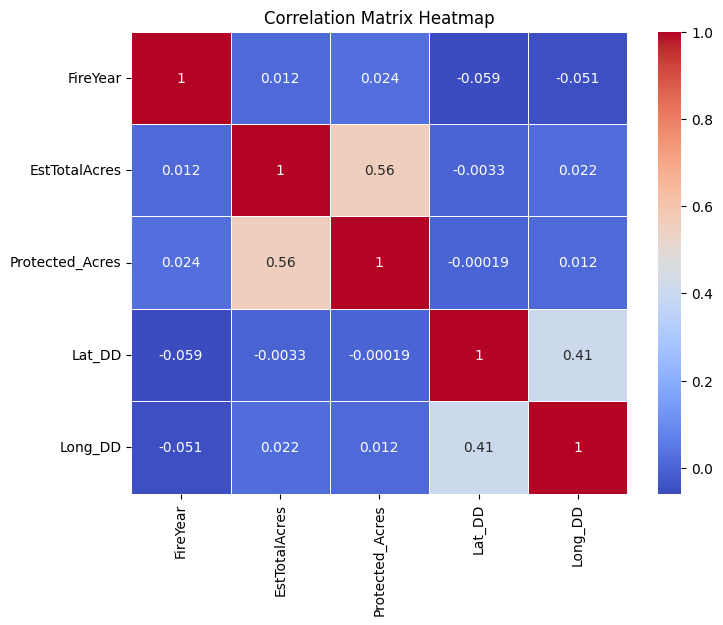

In [14]:
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

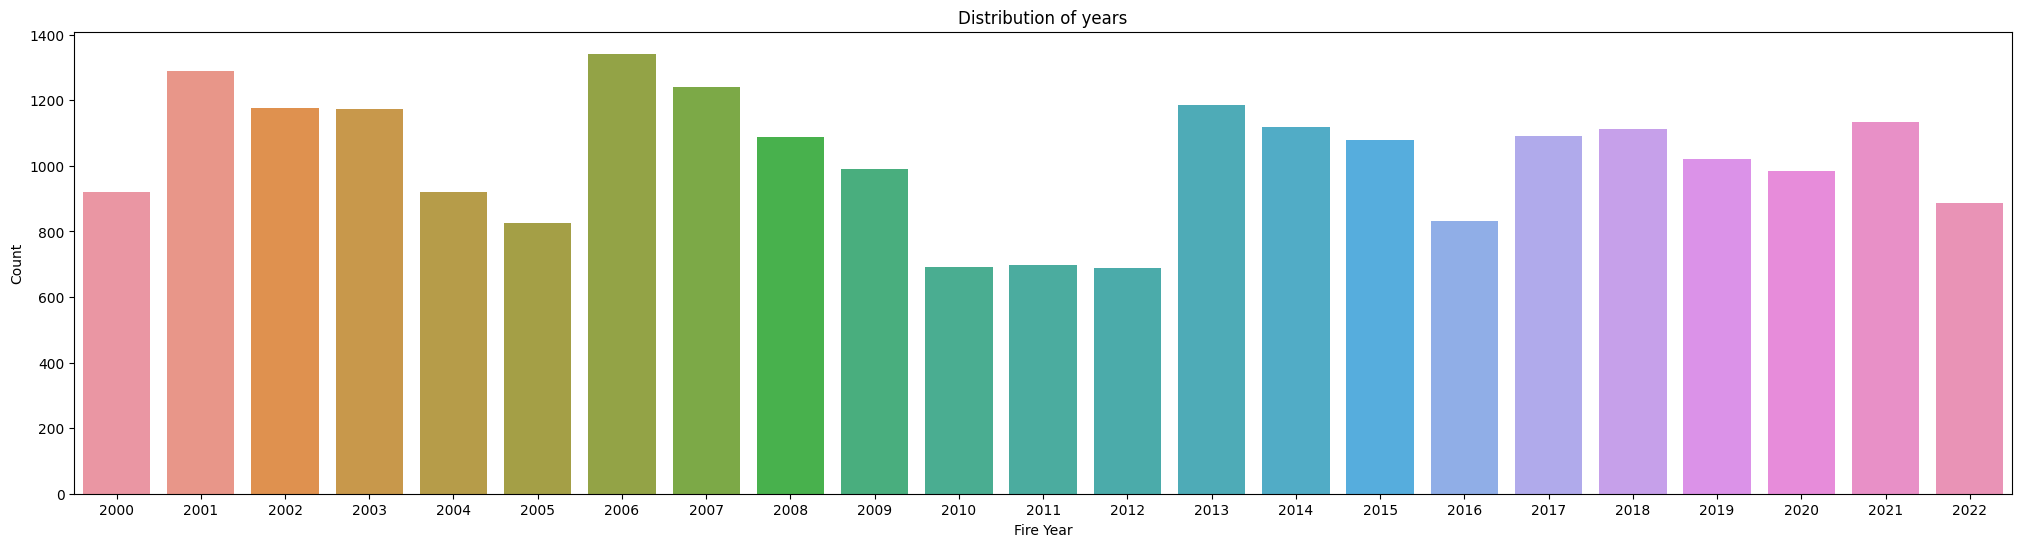

In [15]:
plt.figure(figsize=(25, 6))
sns.countplot(x='FireYear', data=df)
plt.xlabel('Fire Year')
plt.ylabel('Count')
plt.title('Distribution of years')
plt.show()

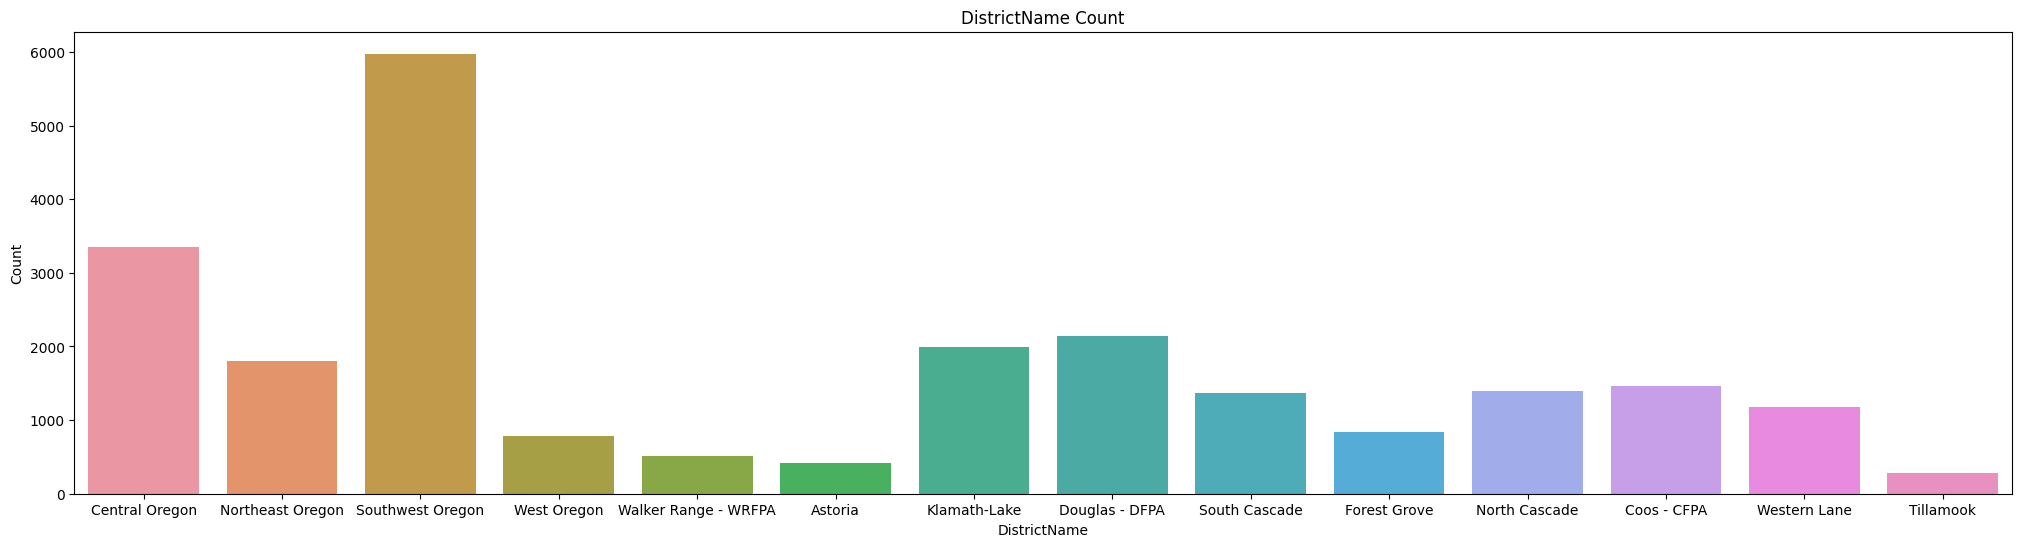

In [16]:
plt.figure(figsize=(25, 6))
sns.countplot(x='DistrictName', data=df)
plt.xlabel('DistrictName')
plt.ylabel('Count')
plt.title('DistrictName Count')
plt.show()

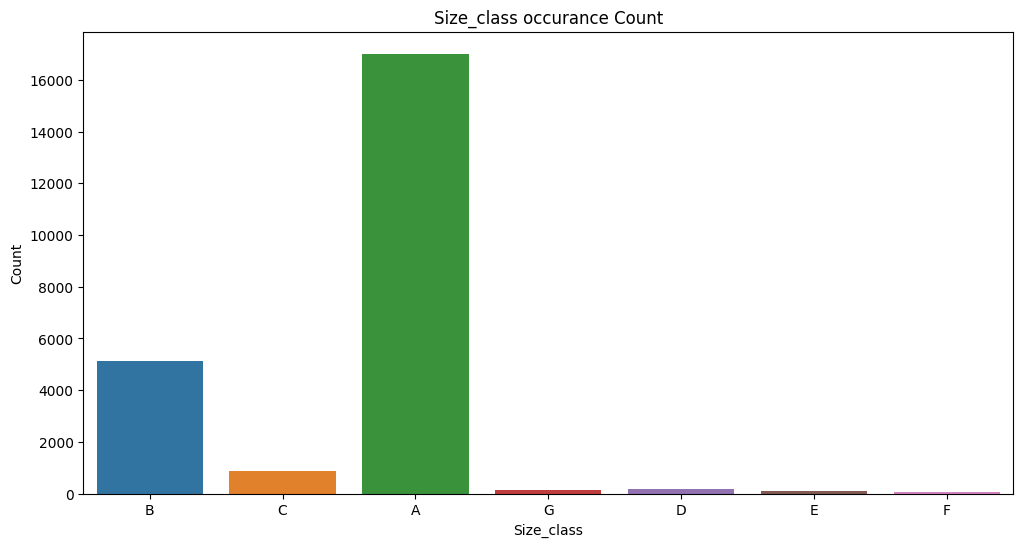

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Size_class', data=df)
plt.xlabel('Size_class')
plt.ylabel('Count')
plt.title('Size_class occurance Count')
plt.show()

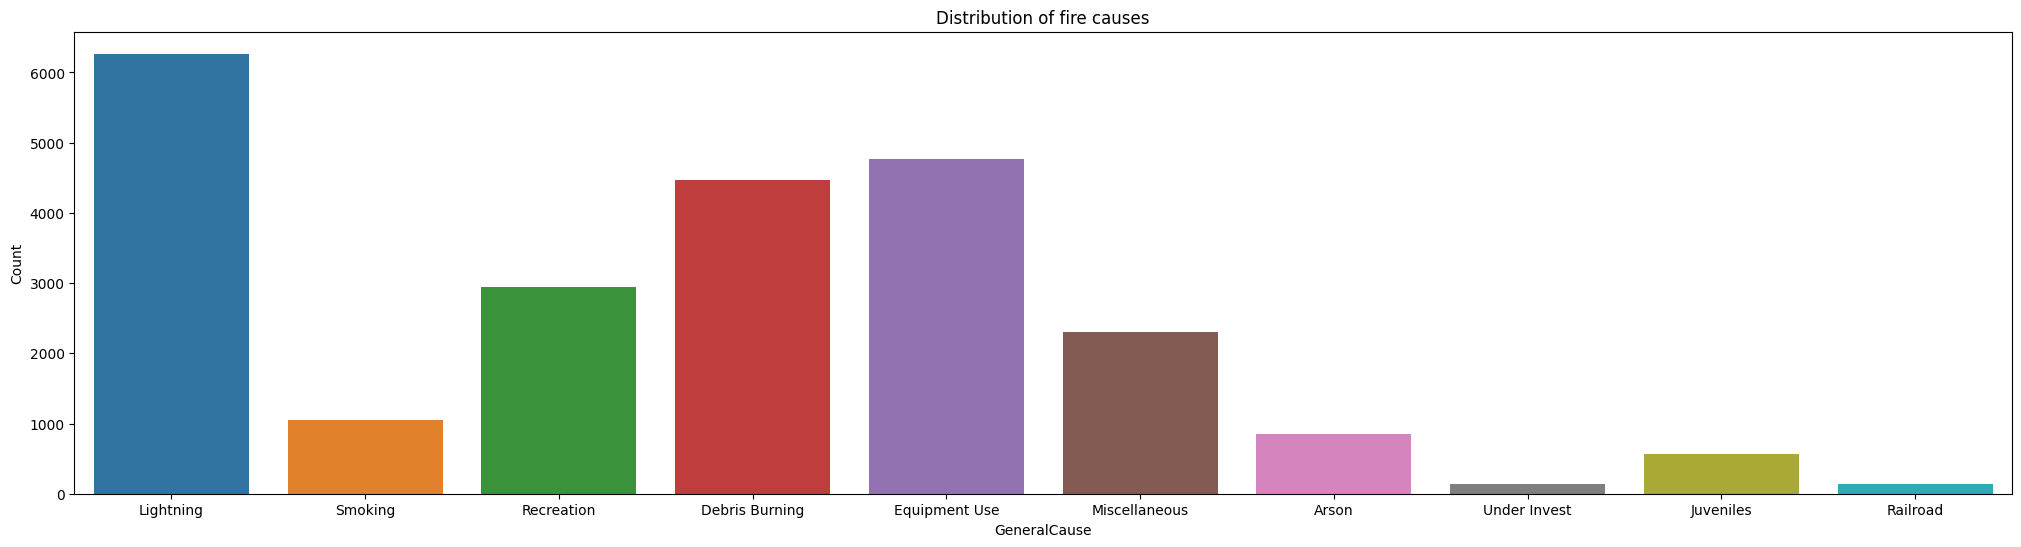

In [18]:
plt.figure(figsize=(25, 6))
sns.countplot(x='GeneralCause', data=df)
plt.xlabel('GeneralCause')
plt.ylabel('Count')
plt.title('Distribution of fire causes')
plt.show()

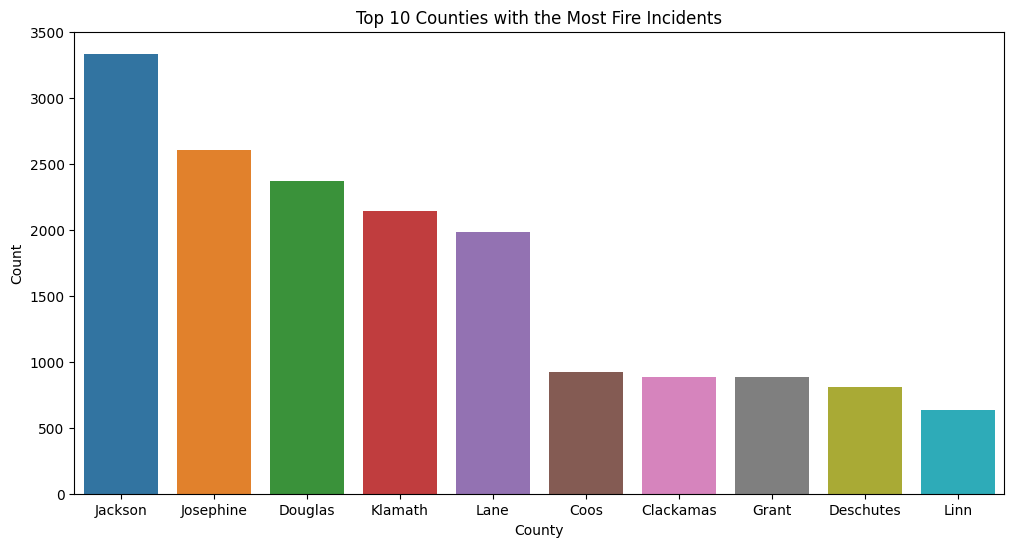

In [19]:
top_counties = df['County'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 counties
df_filtered = df[df['County'].isin(top_counties)]

# Create the countplot for the filtered DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='County', data=df_filtered,order=top_counties)
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Top 10 Counties with the Most Fire Incidents')
plt.show()

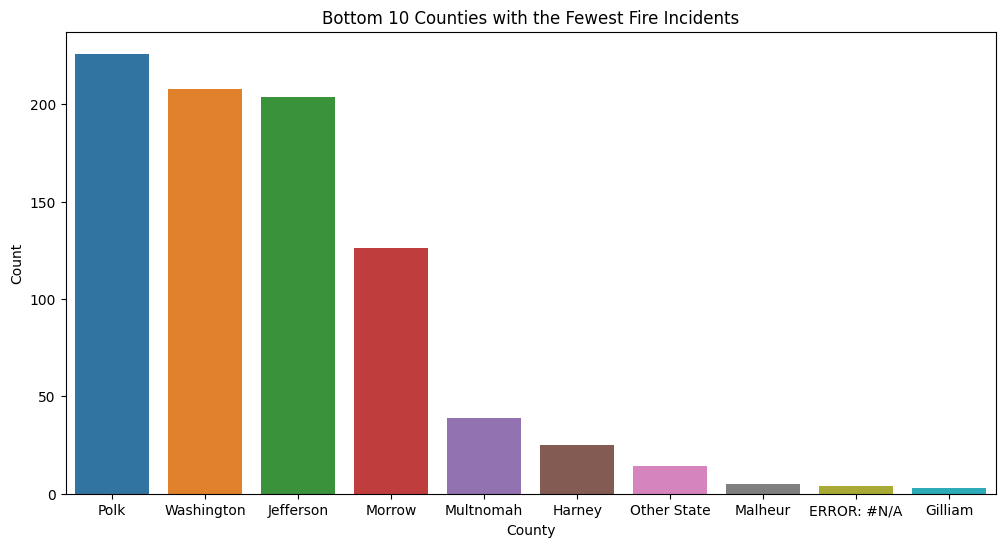

In [20]:
# Get the bottom 10 least occurring counties
bottom_counties = df['County'].value_counts().tail(10).index

# Filter the DataFrame to include only the bottom 10 counties
df_filtered = df[df['County'].isin(bottom_counties)]

# Create the countplot for the filtered DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='County', data=df_filtered, order=bottom_counties)
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Bottom 10 Counties with the Fewest Fire Incidents')
plt.show()

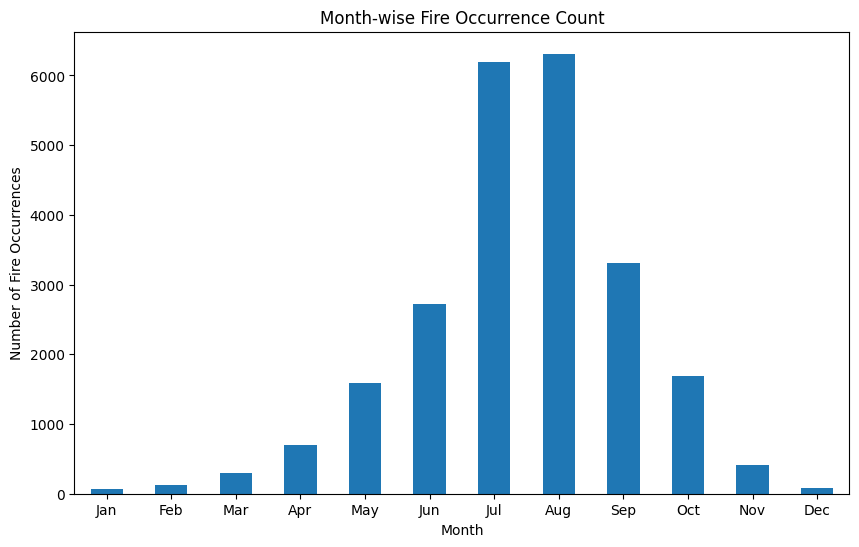

Month-wise Fire Occurrence Counts:
1       68
2      126
3      301
4      702
5     1584
6     2716
7     6191
8     6311
9     3316
10    1694
11     405
12      76
Name: Month, dtype: int64


In [21]:


# Convert 'Ign_DateTime' to datetime format
df['Ign_DateTime'] = pd.to_datetime(df['Ign_DateTime'])

# Extract month from 'Ign_DateTime'
df['Month'] = df['Ign_DateTime'].dt.month

# Calculate month-wise fire occurrence count
monthwise_counts = df['Month'].value_counts().sort_index()

# Create a bar plot of month-wise fire occurrences
plt.figure(figsize=(10, 6))
monthwise_counts.plot(kind='bar', rot=0)
plt.xlabel('Month')
plt.ylabel('Number of Fire Occurrences')
plt.title('Month-wise Fire Occurrence Count')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Display the counts for each month
print("Month-wise Fire Occurrence Counts:")
print(monthwise_counts)




<Axes: title={'center': 'Fires Per Year by Category'}, xlabel='FireYear', ylabel='count'>

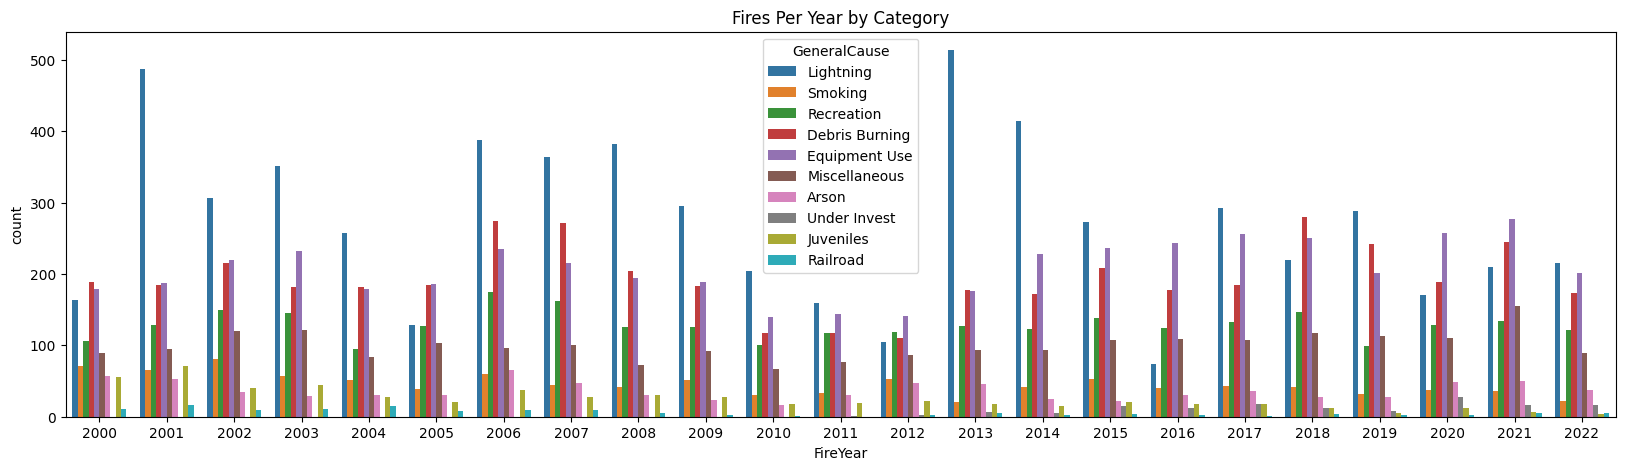

In [22]:
plt.figure(figsize = (20,5))
#plt.subplot(1,2,1)

plt.title("Fires Per Year by Category")
sns.countplot(x = 'FireYear', hue = 'GeneralCause', data = df)

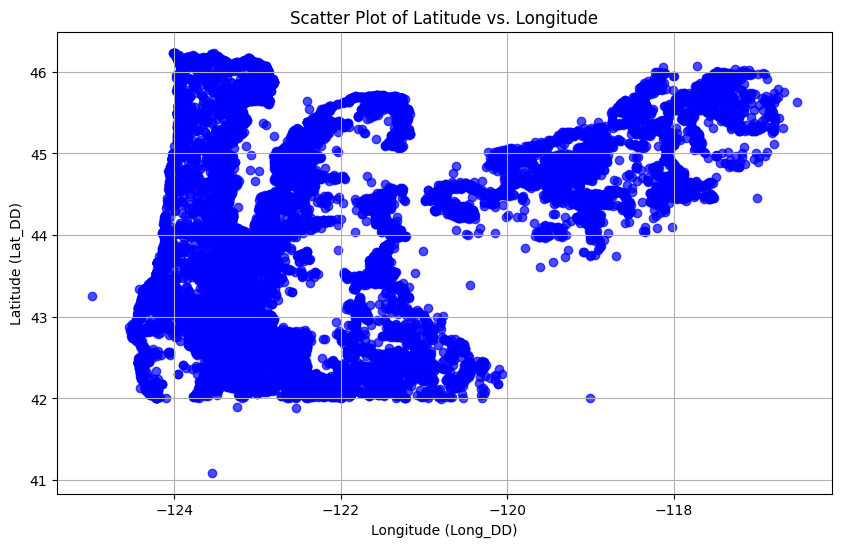

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Long_DD'], df['Lat_DD'], marker='o', c='blue', alpha=0.7)
plt.xlabel('Longitude (Long_DD)')
plt.ylabel('Latitude (Lat_DD)')
plt.title('Scatter Plot of Latitude vs. Longitude')
plt.grid(True)
plt.show()